**Firstly we'll check and classify fake and real profiles using Deep Learning and Neural Networks**

In [1]:
!pip install Kaggle
import os
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import torchvision.utils as vutils
from torch.utils.data import DataLoader
import kagglehub

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("free4ever1/instagram-fake-spammer-genuine-accounts")

print("Path to dataset files:", path)

100%|██████████| 6.81k/6.81k [00:00<00:00, 10.1MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/free4ever1/instagram-fake-spammer-genuine-accounts/versions/1


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,accuracy_score,roc_curve,confusion_matrix

import os
for dirname, _, filenames in os.walk('/root/.cache/kagglehub/datasets/free4ever1/instagram-fake-spammer-genuine-accounts/versions/1'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/root/.cache/kagglehub/datasets/free4ever1/instagram-fake-spammer-genuine-accounts/versions/1/test.csv
/root/.cache/kagglehub/datasets/free4ever1/instagram-fake-spammer-genuine-accounts/versions/1/train.csv


In [4]:
import warnings

warnings.filterwarnings("ignore")


def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=DeprecationWarning)
    fxn()

In [5]:
# Load the training dataset
instagram_df_train=pd.read_csv('/root/.cache/kagglehub/datasets/free4ever1/instagram-fake-spammer-genuine-accounts/versions/1/train.csv')
instagram_df_train

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.27,0,0.00,0,53,0,0,32,1000,955,0
1,1,0.00,2,0.00,0,44,0,0,286,2740,533,0
2,1,0.10,2,0.00,0,0,0,1,13,159,98,0
3,1,0.00,1,0.00,0,82,0,0,679,414,651,0
4,1,0.00,2,0.00,0,0,0,1,6,151,126,0
...,...,...,...,...,...,...,...,...,...,...,...,...
571,1,0.55,1,0.44,0,0,0,0,33,166,596,1
572,1,0.38,1,0.33,0,21,0,0,44,66,75,1
573,1,0.57,2,0.00,0,0,0,0,4,96,339,1
574,1,0.57,1,0.00,0,11,0,0,0,57,73,1


In [6]:
# Load the training dataset
instagram_df_test=pd.read_csv('/root/.cache/kagglehub/datasets/free4ever1/instagram-fake-spammer-genuine-accounts/versions/1/test.csv')
instagram_df_test

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.33,1,0.33,1,30,0,1,35,488,604,0
1,1,0.00,5,0.00,0,64,0,1,3,35,6,0
2,1,0.00,2,0.00,0,82,0,1,319,328,668,0
3,1,0.00,1,0.00,0,143,0,1,273,14890,7369,0
4,1,0.50,1,0.00,0,76,0,1,6,225,356,0
...,...,...,...,...,...,...,...,...,...,...,...,...
115,1,0.29,1,0.00,0,0,0,0,13,114,811,1
116,1,0.40,1,0.00,0,0,0,0,4,150,164,1
117,1,0.00,2,0.00,0,0,0,0,3,833,3572,1
118,0,0.17,1,0.00,0,0,0,0,1,219,1695,1


In [7]:
# Getting dataframe info
instagram_df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   profile pic           576 non-null    int64  
 1   nums/length username  576 non-null    float64
 2   fullname words        576 non-null    int64  
 3   nums/length fullname  576 non-null    float64
 4   name==username        576 non-null    int64  
 5   description length    576 non-null    int64  
 6   external URL          576 non-null    int64  
 7   private               576 non-null    int64  
 8   #posts                576 non-null    int64  
 9   #followers            576 non-null    int64  
 10  #follows              576 non-null    int64  
 11  fake                  576 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 54.1 KB


In [8]:
# Get the statistical summary of the dataframe
instagram_df_train.describe()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,5.760000e+02,576.000000,576.000000
mean,0.701389,0.163837,1.460069,0.036094,0.034722,22.623264,0.116319,0.381944,107.489583,8.530724e+04,508.381944,0.500000
std,0.458047,0.214096,1.052601,0.125121,0.183234,37.702987,0.320886,0.486285,402.034431,9.101485e+05,917.981239,0.500435
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.900000e+01,57.500000,0.000000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.505000e+02,229.500000,0.500000
75%,1.000000,0.310000,2.000000,0.000000,0.000000,34.000000,0.000000,1.000000,81.500000,7.160000e+02,589.500000,1.000000
max,1.000000,0.920000,12.000000,1.000000,1.000000,150.000000,1.000000,1.000000,7389.000000,1.533854e+07,7500.000000,1.000000


In [9]:
# Checking if null values exist
instagram_df_train.isnull().sum()

,0
profile pic,0
nums/length username,0
fullname words,0
nums/length fullname,0
name==username,0
description length,0
external URL,0
private,0
#posts,0
#followers,0


In [10]:
# Get the number of unique values in the "profile pic" feature
instagram_df_train['profile pic'].value_counts()

,count
profile pic,
1,404
0,172


In [11]:
# Get the number of unique values in "fake" (Target column)
instagram_df_train['fake'].value_counts()

,count
fake,
0,288
1,288


**Data Visualization**

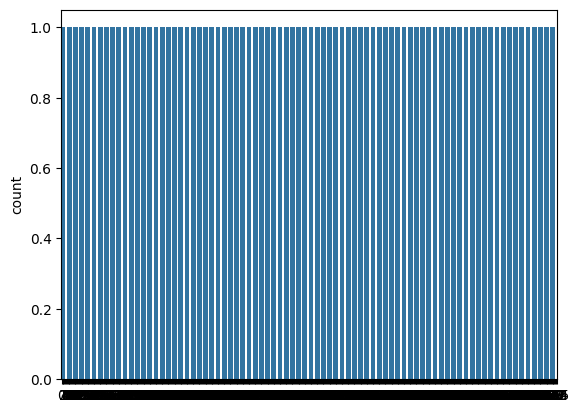

In [12]:
# Visualize the data
sns.countplot(instagram_df_train['fake'])
plt.show()

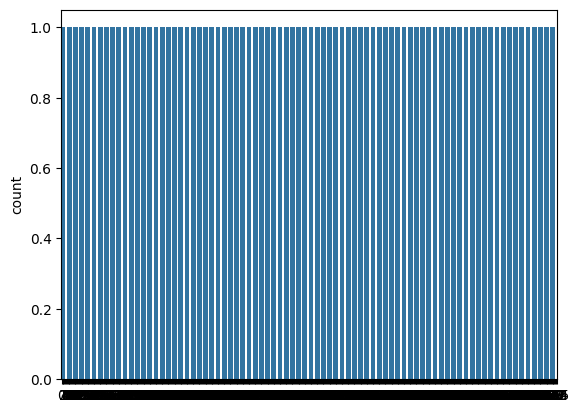

In [13]:
# Visualize the private column data
sns.countplot(instagram_df_train['private'])
plt.show()

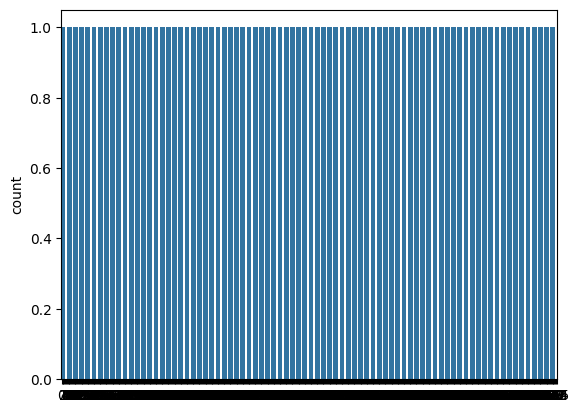

In [14]:
# Visualize the "profile pic" column data
sns.countplot(instagram_df_train['profile pic'])
plt.show()

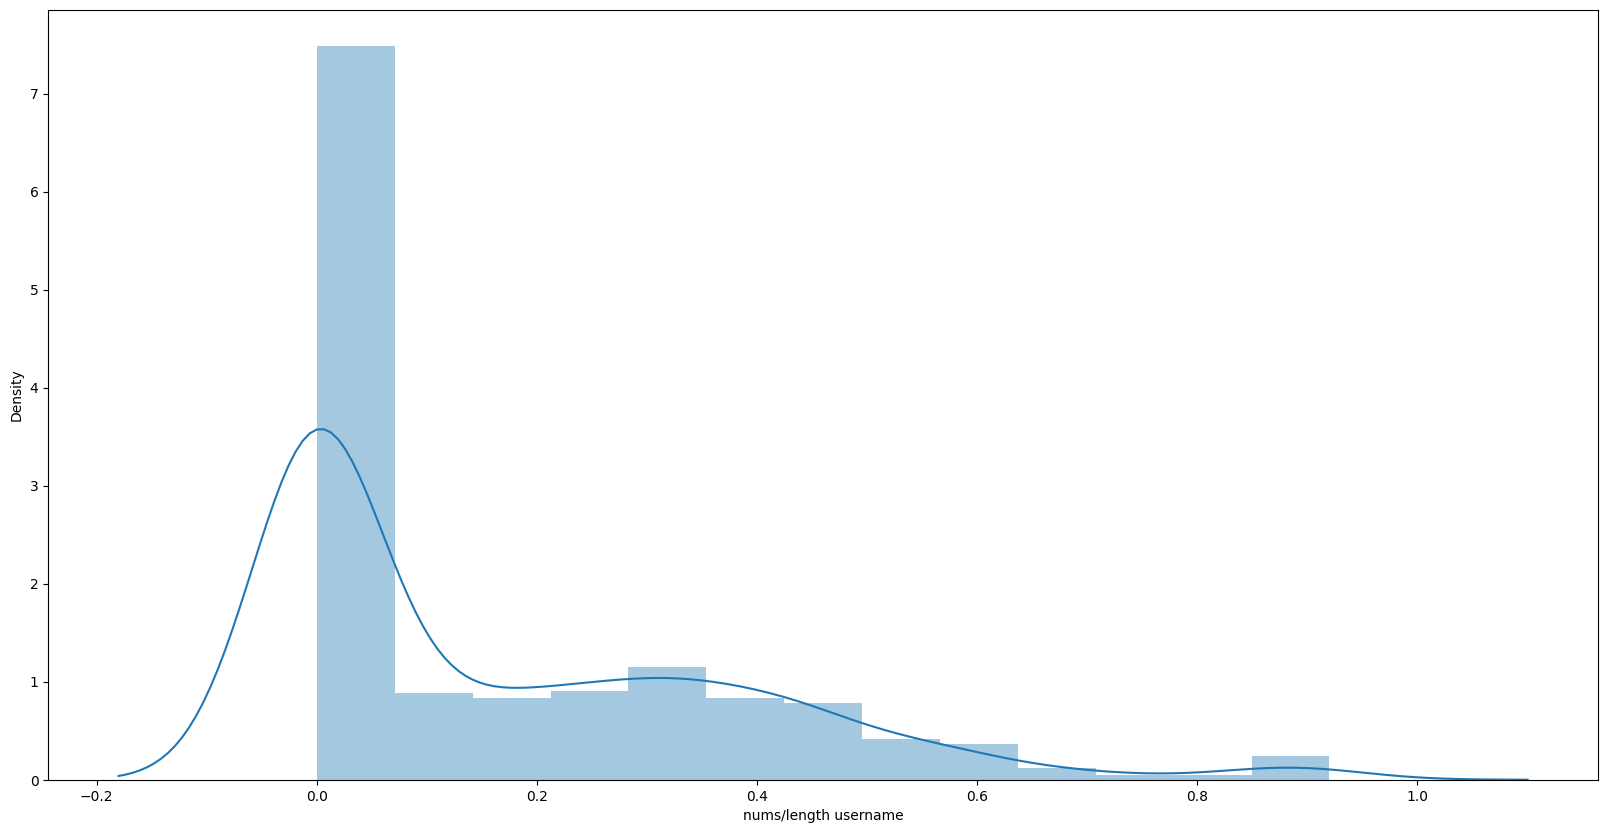

In [15]:
# Visualize the data
plt.figure(figsize = (20, 10))
sns.distplot(instagram_df_train['nums/length username'])
plt.show()

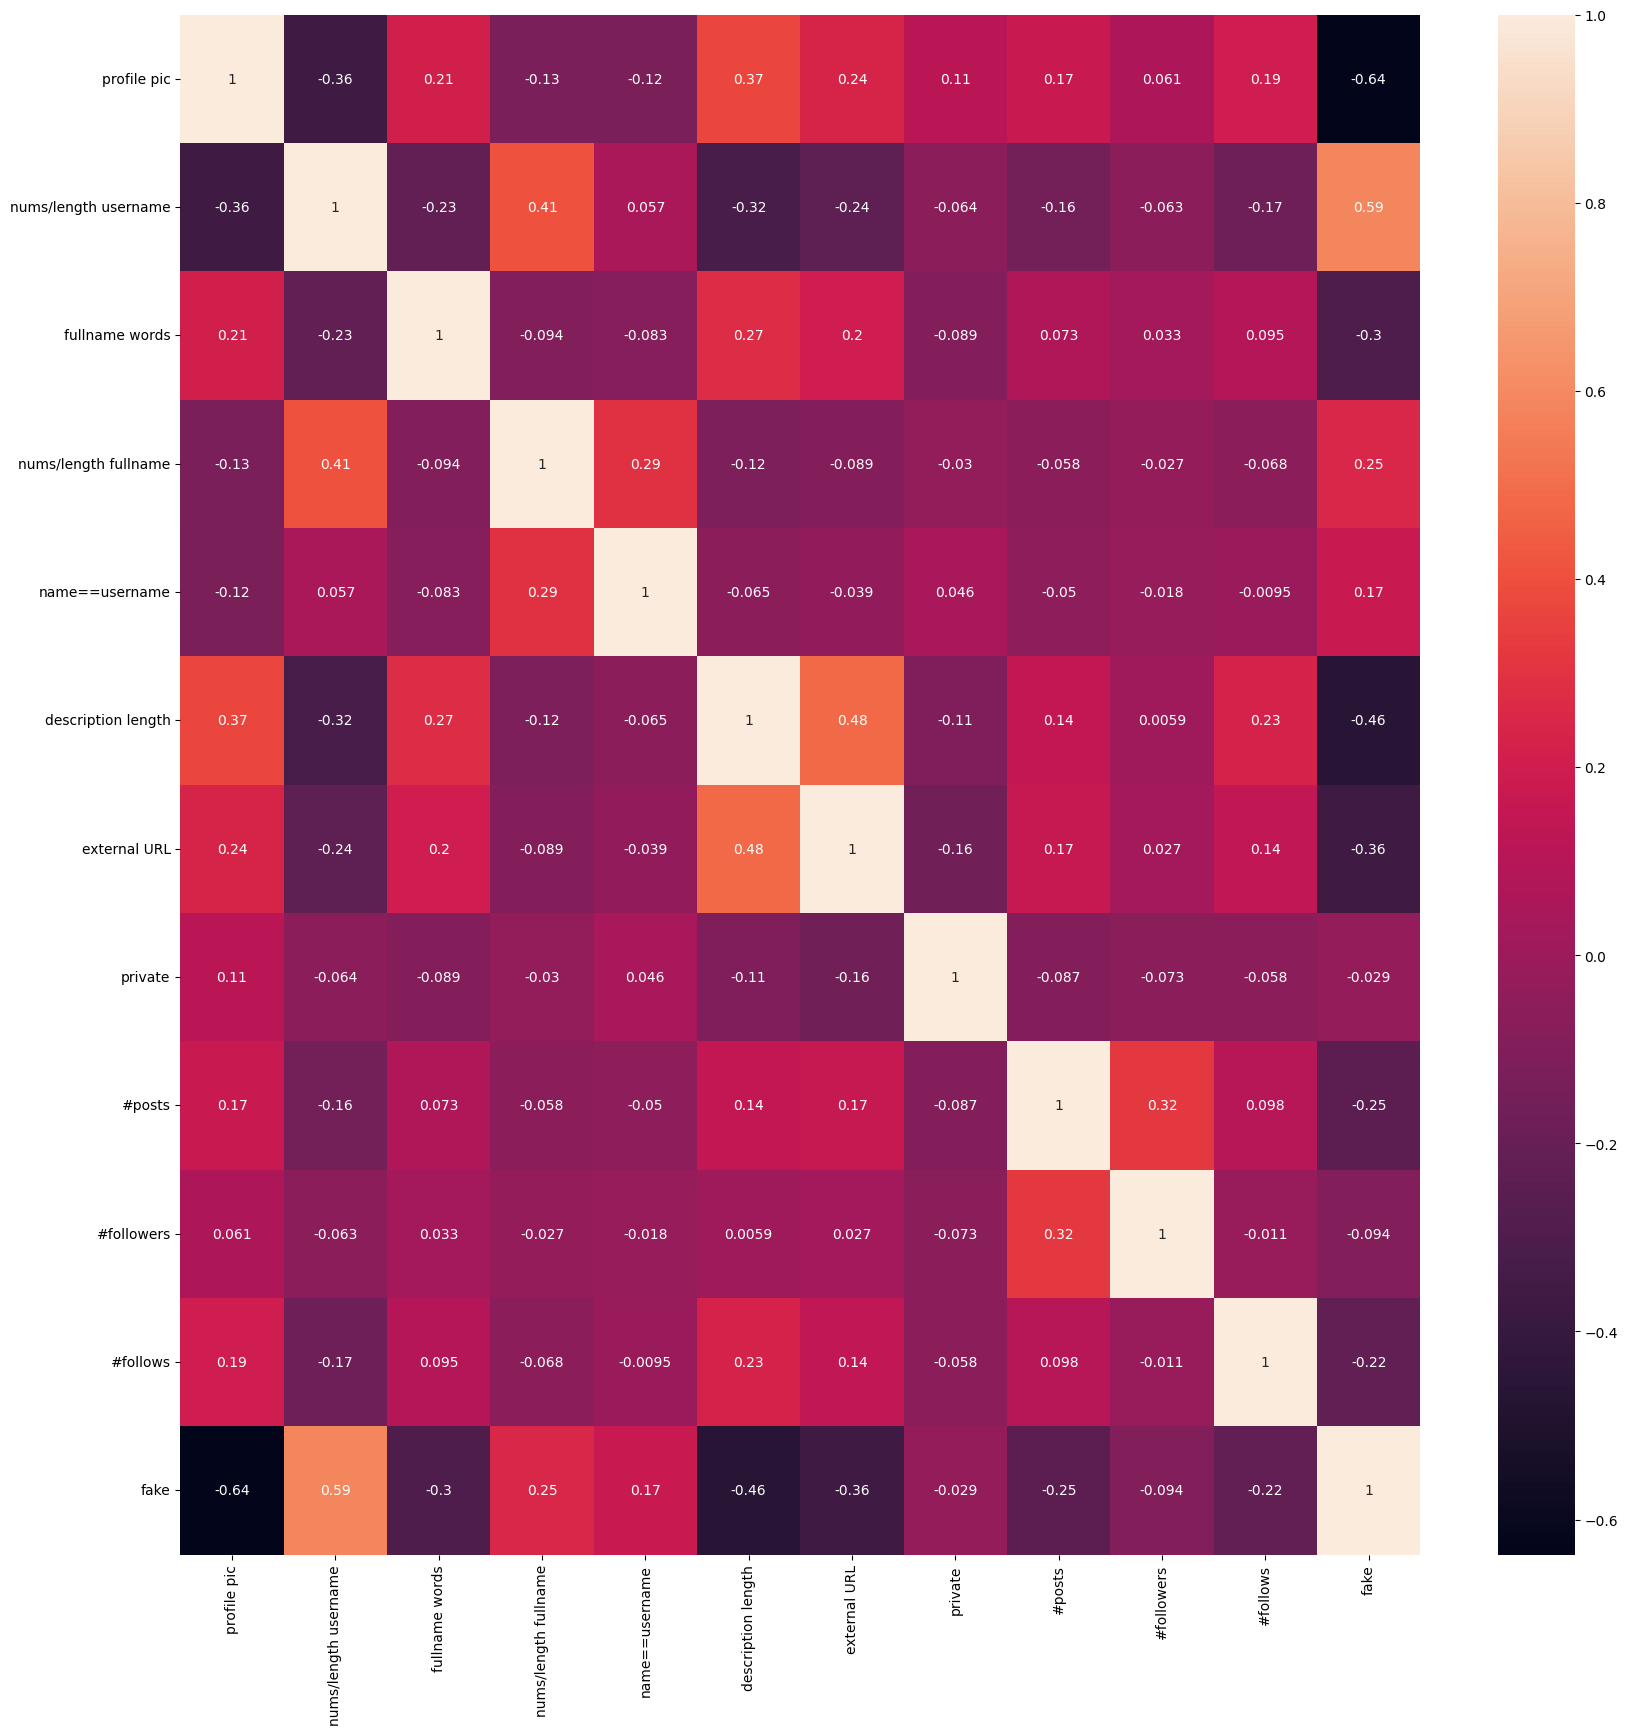

In [16]:
# Correlation plot
plt.figure(figsize=(20, 20))
cm = instagram_df_train.corr()
ax = plt.subplot()
sns.heatmap(cm, annot = True, ax = ax)
plt.show()

**Model Training**

In [17]:
# Training and testing dataset (inputs)
X_train = instagram_df_train.drop(columns = ['fake'])
X_test = instagram_df_test.drop(columns = ['fake'])
X_train

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows
0,1,0.27,0,0.00,0,53,0,0,32,1000,955
1,1,0.00,2,0.00,0,44,0,0,286,2740,533
2,1,0.10,2,0.00,0,0,0,1,13,159,98
3,1,0.00,1,0.00,0,82,0,0,679,414,651
4,1,0.00,2,0.00,0,0,0,1,6,151,126
...,...,...,...,...,...,...,...,...,...,...,...
571,1,0.55,1,0.44,0,0,0,0,33,166,596
572,1,0.38,1,0.33,0,21,0,0,44,66,75
573,1,0.57,2,0.00,0,0,0,0,4,96,339
574,1,0.57,1,0.00,0,11,0,0,0,57,73


In [18]:
# Training and testing dataset (Outputs)
y_train = instagram_df_train['fake']
y_test = instagram_df_test['fake']
y_train

,fake
0,0
1,0
2,0
3,0
4,0
...,...
571,1
572,1
573,1
574,1


In [19]:
# Scale the data before training the model
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler_x = StandardScaler()
X_train = scaler_x.fit_transform(X_train)
X_test = scaler_x.transform(X_test)

In [20]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes = 2)
y_test = tf.keras.utils.to_categorical(y_test, num_classes = 2)

In [21]:
y_train

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [22]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(50, input_dim=11, activation='relu'))
model.add(Dense(150, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(150, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(25, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(2,activation='softmax'))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 50)                  │             600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 150)                 │           7,650 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 150)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 150)                 │          22,650 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 150)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 25)                  │           3,775 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 25)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 2)                   │              52 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 34,727 (135.65 KB)

 Trainable params: 34,727 (135.65 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [24]:
epochs_hist = model.fit(X_train, y_train, epochs = 50,  verbose = 1, validation_split = 0.1)

Epoch 1/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.6321 - loss: 0.6293 - val_accuracy: 0.8276 - val_loss: 0.5861
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8909 - loss: 0.4187 - val_accuracy: 0.8621 - val_loss: 0.4088
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9008 - loss: 0.3256 - val_accuracy: 0.8966 - val_loss: 0.2962
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9084 - loss: 0.2551 - val_accuracy: 0.9138 - val_loss: 0.2382
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9034 - loss: 0.2576 - val_accuracy: 0.8966 - val_loss: 0.2620
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9166 - loss: 0.2110 - val_accuracy: 0.8793 - val_loss: 0.3030
Epoch 7/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9097 - loss: 0.2546 - val_accuracy: 0.8793 - val_loss: 0.2232
Epoch 8/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9136 - loss: 0.2345 - val_accuracy: 0.8793 - val_loss

In [25]:
print(epochs_hist.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


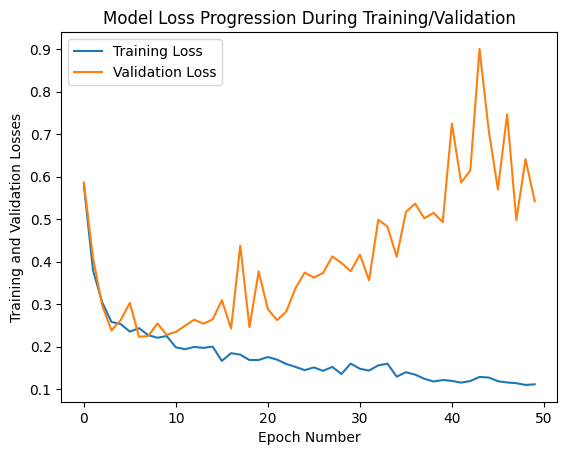

In [26]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])

plt.title('Model Loss Progression During Training/Validation')
plt.ylabel('Training and Validation Losses')
plt.xlabel('Epoch Number')
plt.legend(['Training Loss', 'Validation Loss'])
plt.show()

In [27]:
predicted = model.predict(X_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


In [28]:
predicted_value = []
test = []
for i in predicted:
    predicted_value.append(np.argmax(i))

for i in y_test:
    test.append(np.argmax(i))

In [29]:
print(classification_report(test, predicted_value))

              precision    recall  f1-score   support

           0       0.89      0.90      0.89        60
           1       0.90      0.88      0.89        60

    accuracy                           0.89       120
   macro avg       0.89      0.89      0.89       120
weighted avg       0.89      0.89      0.89       120



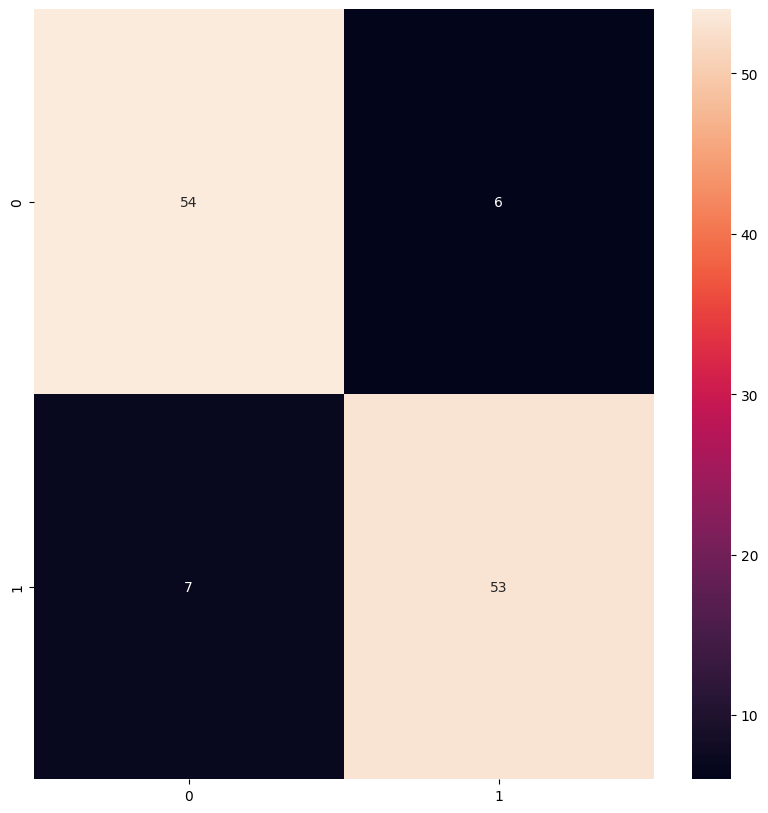

In [30]:
plt.figure(figsize=(10, 10))
cm=confusion_matrix(test, predicted_value)
sns.heatmap(cm, annot=True)
plt.show()

**Using a Neural Network**

In [31]:
y_train.shape

(576, 2)

In [32]:
model = Sequential()
model.add(Dense(11, input_dim=X_train.shape[1], activation='linear', name='input_layer'))
model.add(Dense(22, activation='linear', name='hidden_layer'))
model.add(Dropout(0.0))
# Changed the output layer to have 2 nodes and softmax activation
model.add(Dense(2, activation='softmax', name='output_layer'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (Dense)                  │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden_layer (Dense)                 │ (None, 22)                  │             264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 22)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 2)                   │              46 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 442 (1.73 KB)

 Trainable params: 442 (1.73 KB)

 Non-trainable params: 0 (0.00 B)

In [33]:
training = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=0)
val_acc = np.mean(training.history['accuracy'])
print("\n%s: %.2f%%" % ('accuracy', val_acc*100))


accuracy: 85.35%


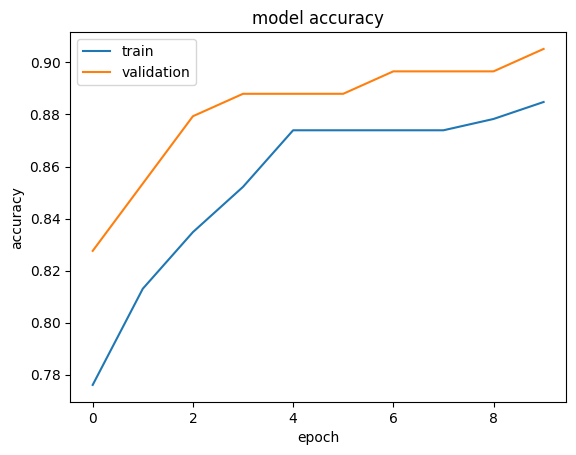

In [34]:
# summarize history for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

**Secondly we will check and classify Fake and real images using CNN**

In [35]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

import warnings
warnings.filterwarnings("ignore")

In [36]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uditsharma72/real-vs-fake-faces")

print("Path to dataset files:", path)

100%|██████████| 215M/215M [00:01<00:00, 146MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/uditsharma72/real-vs-fake-faces/versions/4


In [37]:
data = tf.keras.utils.image_dataset_from_directory('/root/.cache/kagglehub/datasets/uditsharma72/real-vs-fake-faces/versions/4')

Found 2041 files belonging to 2 classes.


In [38]:
class_names = data.class_names
class_names

['fake', 'real']

In [39]:
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()

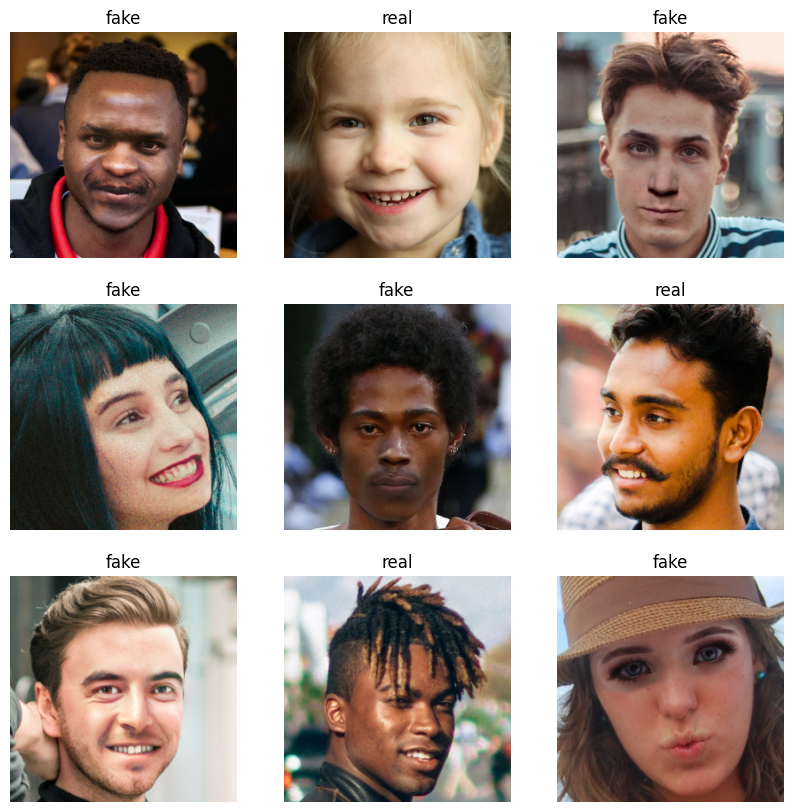

In [40]:
plt.figure(figsize=(10, 10))
for images, labels in data.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

Scaling the data

In [41]:
data = data.map(lambda x,y: (x/255, y)) # x/255
data.as_numpy_iterator().next()

(array([[[[0.2997482 , 0.21347369, 0.12327761],
          [0.3045956 , 0.20655638, 0.12028186],
          [0.3024232 , 0.20345914, 0.11764706],
          ...,
          [0.30588236, 0.20110294, 0.10949755],
          [0.3019608 , 0.20784314, 0.11372549],
          [0.30282533, 0.20697859, 0.11372549]],
 
         [[0.30467698, 0.20663776, 0.12036324],
          [0.30980393, 0.21176471, 0.1254902 ],
          [0.30980393, 0.21176471, 0.1254902 ],
          ...,
          [0.30598766, 0.2010857 , 0.10449506],
          [0.3020824 , 0.20784219, 0.11354262],
          [0.30588236, 0.20392157, 0.11372549]],
 
         [[0.30885705, 0.20989296, 0.12408088],
          [0.30588236, 0.20784314, 0.12156863],
          [0.29894206, 0.21266755, 0.12247147],
          ...,
          [0.31262255, 0.2       , 0.10486941],
          [0.30974266, 0.20778187, 0.10974265],
          [0.30682924, 0.20486845, 0.11185375]],
 
         ...,
 
         [[0.28615198, 0.29041916, 0.22708908],
          [0.28592

Spliting the dataset

In [42]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [43]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

CNN Model

In [44]:
model = Sequential()

model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

loss = loss=tf.losses.BinaryCrossentropy()
model.compile(loss=loss, optimizer='adam',  metrics=["accuracy"])

In [45]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [46]:
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [47]:
hist = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 117s 3s/step - accuracy: 0.5106 - loss: 0.8657 - val_accuracy: 0.5156 - val_loss: 0.6908
Epoch 2/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 120s 3s/step - accuracy: 0.5604 - loss: 0.6875 - val_accuracy: 0.5495 - val_loss: 0.6877
Epoch 3/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 117s 3s/step - accuracy: 0.6020 - loss: 0.6854 - val_accuracy: 0.5286 - val_loss: 0.7847
Epoch 4/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 115s 3s/step - accuracy: 0.6122 - loss: 0.6756 - val_accuracy: 0.6250 - val_loss: 0.6588
Epoch 5/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 115s 3s/step - accuracy: 0.7289 - loss: 0.5902 - val_accuracy: 0.6901 - val_loss: 0.6148
Epoch 6/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 115s 3s/step - accuracy: 0.7248 - loss: 0.5362 - val_accuracy: 0.6406 - val_loss: 0.6353
Epoch 7/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 123s 3s/step - accuracy: 0.8006 - loss: 0.4296 - val_accuracy: 0.6875 - val_loss: 0.6054
Epoch 8/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 117s 3s/step - accuracy: 0.8781 - loss: 0.3324 - val_accuracy: 0.6771 - v

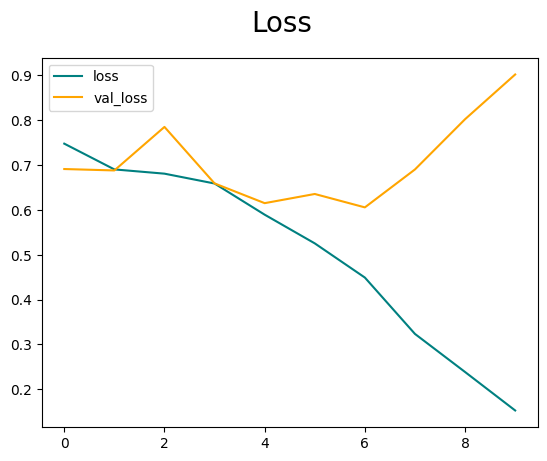

In [48]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [49]:
loss, accuracy = model.evaluate(test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 18s 701ms/step - accuracy: 0.6341 - loss: 1.4544


In [50]:
print("Loss: ", loss)
print("Accuracy: ", accuracy)

Loss:  1.578412413597107
Accuracy:  0.625
